# Obstacle Detection System
## by Nishantkumar V Patel


Importing the libraries

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Import the Yolo Files

In [28]:

model = cv.dnn.readNet("/Users/jamesbond/Desktop/yolov3-tiny.weights",'/Users/jamesbond/Desktop/yolov3-tiny.cfg')

with open('/Users/jamesbond/Desktop/coco.names' ,'r') as file:
    classes = file.read().split('\n')[:-1]

final_class = []   
for cls in classes:
    final_class.append(cls)
    
classes = final_class

In [26]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [44]:

layer_names   = model.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in model.getUnconnectedOutLayers()]
output layers are yolo_23 and yolo_16.

img = cv.imread('/Users/jamesbond/Desktop/test image.jpeg')

height , width ,channels  = img.shape

blob = cv.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop = False)
model.setInput(blob)

outputs = model.forward(output_layers)
class_ids = []
confidences = []
boxes = []

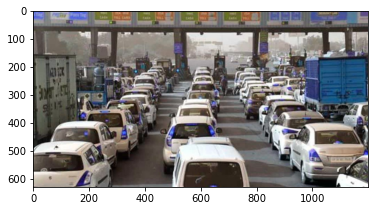

In [35]:
plt.imshow(img)

In [ ]:

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        conficence = scores[class_id]
        
        if (conficence > 0.5):
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(conficence))
            class_ids.append(class_id)
indexed = cv.dnn.NMSBoxes(boxes , confidences, 0.5, 0.4)

In [ ]:

for i in range(len(boxes)):
    
    if i in indexed:
        x, y, w ,h = boxes[i]
        label = classes[class_ids[i]]
        cv.rectangle( img, (x,y), (x+w, y+h), (0,255,0), 2)
        cv.putText(img ,label, (x, y + 30), cv.FONT_HERSHEY_PLAIN, 3, (0,255,0),3)

Creating the predicting image

In [43]:
cv.imwrite("/Users/jamesbond/Desktop/predicted_image.png",img)

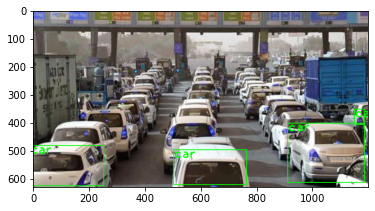

In [42]:
final_image= cv.imread("/Users/jamesbond/Desktop/predicted_image.png")
plt.imshow(final_image)